In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
#Read the data and define columns
Datas = pd.read_csv('CaffeineSurvey.csv')
mgs = Datas['mg']
gpa = Datas['GPA']
sleep = Datas['Sleep']
productivity = Datas['Productivity']
stress = Datas['Stress']

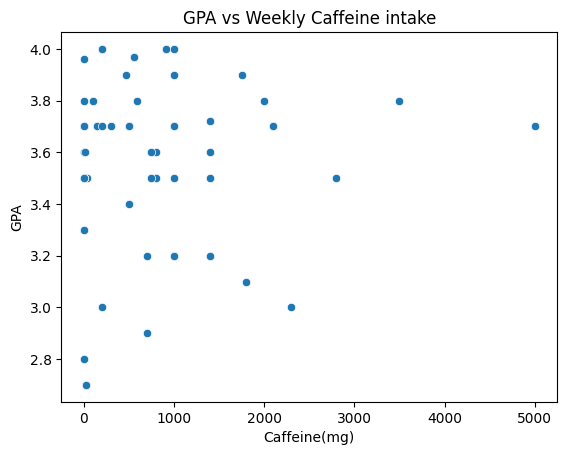

In [28]:
#Seaborn scatter plot 
sns.scatterplot(x='mg', y='GPA', data=Datas,)
plt.xlabel('Caffeine(mg)')
plt.ylabel('GPA')
plt.title('GPA vs Weekly Caffeine intake')
plt.show()

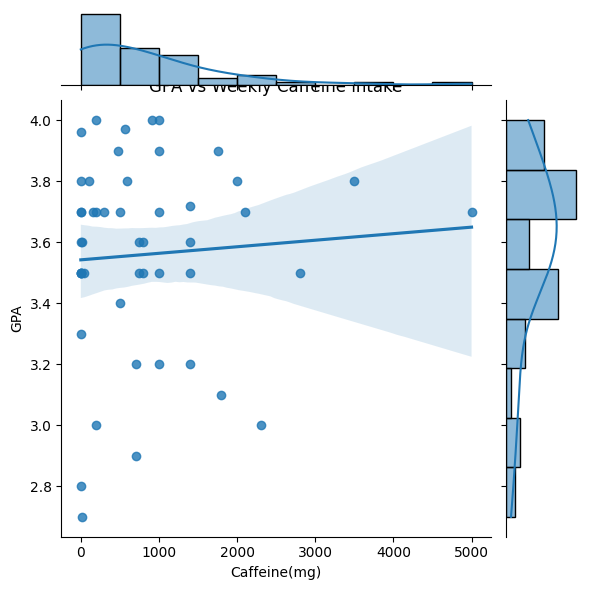

In [29]:
#Seaborn joint plot 
sns.jointplot(x='mg', y='GPA', data=Datas, kind="reg")
plt.xlabel('Caffeine(mg)')
plt.ylabel('GPA')
plt.title('GPA vs Weekly Caffeine intake')
plt.show()